### **Gradient Descent**
***
## **Introduction**

Gradient Descent is a fundamental optimization algorithm used in machine learning and deep learning for minimizing the cost function. It's particularly useful in training models, where the goal is to find the best set of parameters that minimizes a given cost function.

Basic Concept:

* Cost Function: This is a function that measures how far off a model's predictions are from the actual outcomes. In machine learning, the goal is often to minimize this function.

* Gradient: The gradient is a vector that points in the direction of the greatest rate of increase of the function. In the context of gradient descent, we're interested in the negative gradient, which points in the direction of the steepest decrease.

Descent: The method involves taking iterative steps in the direction of the negative gradient of the cost function in order to find its minimum value.

**How It Works:**

* Initialization: Start with initial values for the parameters (weights) of the model.

* Compute the Gradient: Calculate the gradient of the cost function with respect to each parameter. In simple terms, this tells us how the cost function would change if you changed the parameters.

* Update the Parameters: Adjust the parameters in the direction that reduces the cost function. This is done by subtracting a fraction of the gradient from the current values of the parameters. The size of this fraction is governed by the learning rate.

* Repeat: Repeat the steps of computing the gradient and updating the parameters until the cost function stops decreasing significantly or a maximum number of iterations is reached.

***
## Implementation

The dataset is a real estate with 331 samples, 6 variables and one responsor price of unit. The 6 features are transaction, house, distance to the nearest MRT station, number of convenience stores, latitude, latitude.

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load Real estate data
data = pd.read_csv(r"~/Downloads/Real estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [80]:
X, Y = data.iloc[:, 2:7], data.iloc[:,7]
# add Beta_0 column
X = np.hstack((X, np.ones((X.shape[0], 1))))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Scaling the features
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])
X_test[:, :-1] = scaler.transform(X_test[:, :-1])

# Gradient Descent function
def gd(X, Y, para, alpha, num):
    n = X.shape[0]
    MSE_hist = []
    
    for i in range(num):
        Y_hat = np.dot(X, para)
        res = Y - Y_hat
        grad = -2 / n * np.dot(X.T, res)
        para = para - alpha * grad
        MSE = np.mean(res ** 2)
        MSE_hist.append(MSE)
    return para, MSE_hist

# Initialize parameters
Start_para = np.random.randn(X.shape[1])
alpha = 0.01
num = 100
para, MSE_hist = gd(X_train, Y_train, Start_para, alpha, num)

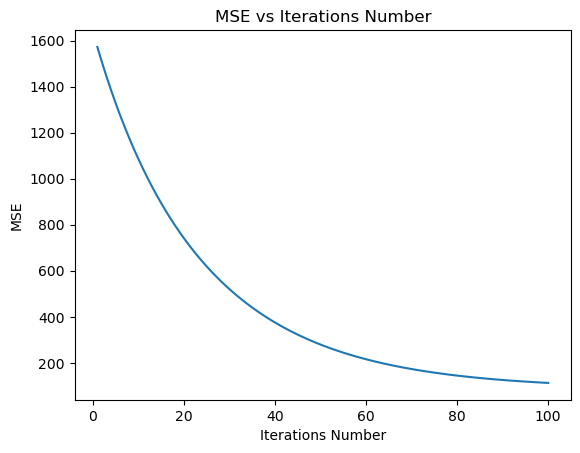

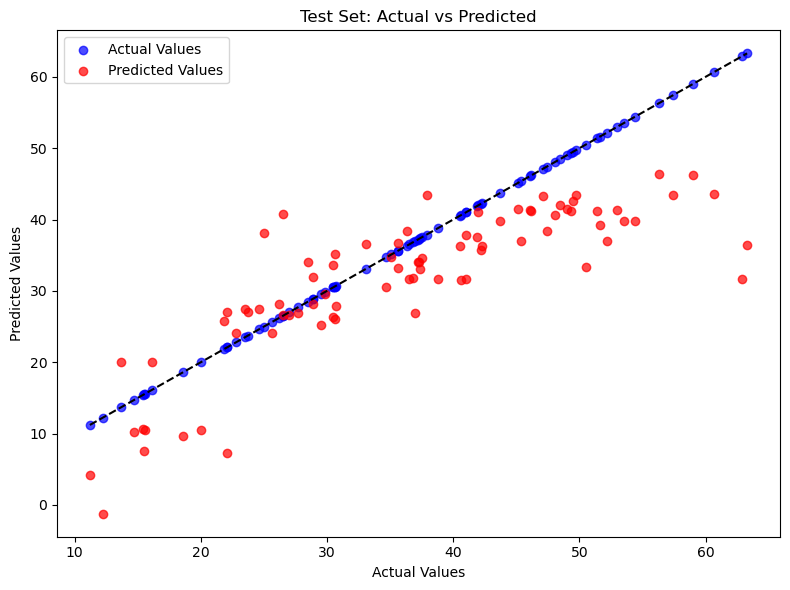

In [81]:
# Plot the MSE history
plt.plot(range(1, num + 1), MSE_hist)
plt.xlabel('Iterations Number')
plt.ylabel('MSE')
plt.title('MSE vs Iterations Number')
plt.show()

# Make predictions on the test set
Y_hat = np.dot(X_test, para)

import matplotlib.pyplot as plt

# Compare the prediction and actual value
Y_pred_test = np.dot(X_test, para)

# Test set plot
plt.figure(figsize=(8, 6))  # Adjusting the figure size for clarity
plt.scatter(Y_test, Y_test, alpha=0.7, color='blue', label='Actual Values')  # Actual values in blue
plt.scatter(Y_test, Y_pred_test, alpha=0.7, color='red', label='Predicted Values')  # Predicted values in red
plt.title("Test Set: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--')  # Diagonal line
plt.legend()  # Add a legend to distinguish between actual and predicted values

plt.tight_layout()
plt.show()

